In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [8]:
data = pd.read_csv('car.csv')
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [9]:
data.shape

(301, 9)

In [10]:
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

## Data Quality Check 

In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
data.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


/var/folders/fk/8r90byvd1rb3gsnn069d2z7c0000gn/T/ipykernel_50099/2716823475.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


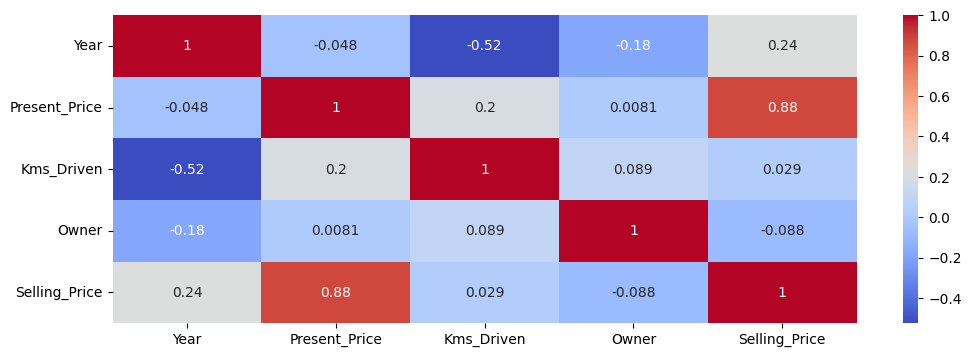

In [20]:
# Plot correlation 

plt.figure(figsize= (12,4))
correlations = data.corr()
sns.heatmap(correlations, cmap = 'coolwarm', annot = True)
plt.show()

## Data Preprocessing 

In [22]:
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [23]:
# Target column is Selling price ]
predict = 'Selling_Price'
data = data[['Year', 'Kms_Driven', 'Present_Price','Fuel_Type','Transmission', 'Owner', 'Selling_Price']]

In [26]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

/var/folders/fk/8r90byvd1rb3gsnn069d2z7c0000gn/T/ipykernel_50099/49942920.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Model Training

In [28]:
lrmodel = LinearRegression().fit(X_train, y_train)
dt_model = DecisionTreeRegressor().fit(X_train, y_train)
rf_model = RandomForestRegressor().fit(X_train, y_train)
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
xgb_model = XGBRegressor().fit(X_train, y_train)

In [35]:
X_train

array([[2.0160e+03, 5.6000e+03, 5.9700e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0170e+03, 1.6200e+04, 6.4900e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0160e+03, 2.5000e+04, 8.4000e-01, 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0150e+03, 4.0324e+04, 1.3600e+01, 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0110e+03, 6.9341e+04, 1.0000e+01, 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0150e+03, 3.5866e+04, 7.1300e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00]])

## Model Evaluation

In [29]:
def eval_model(model, X_test, y_test):
    prediction = model.predict(X_test)
    print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
    print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, prediction))
    print("Mean Square Error:", mean_squared_error(y_test, prediction))
    print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, prediction)))
    print("R2 Score:", r2_score(y_test, prediction))

In [30]:
print('LR_model')
eval_model(lrmodel,X_test, y_test)
print('dt_model')
eval_model(dt_model,X_test, y_test)
print('rf_model')
eval_model(rf_model,X_test, y_test)
print('gbm_model')
eval_model(gbm_model,X_test, y_test)
print('xgb_model')
eval_model(xgb_model,X_test, y_test)

LR_model
Mean Absolute Error: 1.4099564709167942
Mean Absolute Percentage Error: 1.06530408869264
Mean Square Error: 7.058241536859957
Root Mean Square Error: 2.6567351273433255
R2 Score: 0.7996620241253103
dt_model
Mean Absolute Error: 0.7037704918032787
Mean Absolute Percentage Error: 0.21099188847977915
Mean Square Error: 1.1172344262295082
Root Mean Square Error: 1.0569931060463489
R2 Score: 0.968288916954815
rf_model
Mean Absolute Error: 0.814573770491803
Mean Absolute Percentage Error: 0.17273575098411545
Mean Square Error: 5.021022715737704
Root Mean Square Error: 2.240763868804052
R2 Score: 0.8574855334096103
gbm_model
Mean Absolute Error: 0.9191999001238754
Mean Absolute Percentage Error: 0.1881387429341019
Mean Square Error: 7.066428842999062
Root Mean Square Error: 2.6582755393297854
R2 Score: 0.7994296392839573
xgb_model
Mean Absolute Error: 0.8404076990827185
Mean Absolute Percentage Error: 0.1866269992646531
Mean Square Error: 3.5315630315389357
Root Mean Square Error: 1.

From the above result, Decision Tree Model has the lowest MAE and has the highest R2 score. So the final model will be Decision Tree Model

## Prediction 

In [31]:
pred = dt_model.predict(X_test)
pred

array([ 3.75,  0.4 , 14.9 ,  8.35,  4.  ,  0.5 ,  3.9 ,  1.15, 20.75,
       12.9 ,  7.2 ,  5.15,  5.5 ,  9.1 ,  0.4 ,  0.75,  3.25,  0.65,
        0.3 ,  4.8 ,  3.75,  2.1 ,  0.65,  3.75,  0.4 ,  0.65,  2.25,
        0.45, 18.  ,  4.8 ,  4.15,  7.45,  0.4 ,  5.25, 11.75,  5.25,
       33.  ,  1.1 ,  6.5 ,  7.45,  4.75,  1.05,  5.25,  0.48,  2.  ,
        3.95,  0.5 ,  3.1 ,  0.4 ,  0.52,  0.78,  0.6 ,  6.85,  0.2 ,
        1.65,  3.25,  7.75,  7.45,  7.2 ,  0.52,  9.25])

In [38]:
# Predict new unknow data 
input = [[2016, 30000, 6.87, 1, 1, 0]]
price = dt_model.predict(input)
print(price.round(1)[0], "in Lakhs")

4.0 in Lakhs


## Save Model

In [39]:
import pickle 
pickle.dump(dt_model, open("car_price_predictor_model,pkl", "wb"))

In [1]:
from fastapi import FastAPI 
